In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

#### Reading the first image in the  bike folder

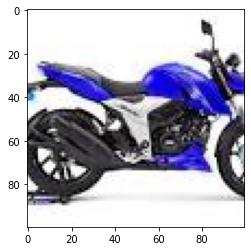

In [3]:
#reading the first data in the data folder
DATADIR="vechicles/train"
categories=['bike','boat','bus']

for category in categories:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [4]:
print(img_array.shape)

(100, 100, 3)


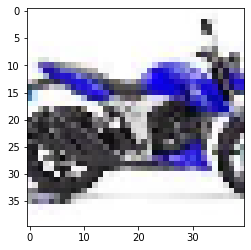

In [5]:
#resizing the image
IMG_SIZE=40
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)
plt.show()

### Writing a function to go through all the images in the training data folders 

In [6]:
IMG_SIZE=40
# specify datadirectory 
DATADIR="vechicles/train"
categories=['bike','boat','bus'] #category labels in the seperate folders 

training_data=[]
#reading through the folders and appending it in training list
def create_training_data():
    for category in categories:
        path=os.path.join(DATADIR,category)
        class_num=categories.index(category) # label the training data 
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) #resizing the image
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

        
create_training_data() # create the training data folder     
            
     

### Shuffle the training data list

In [7]:
#shuffle data
import random
random.shuffle(training_data)

### Divide predictor and target set

In [8]:

X=[]
y=[]

append features to X and labels to y;  (later x and y should be converted in to np.array

In [9]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)



In [10]:
X.shape

(144, 40, 40, 3)

In [12]:
y=np.array(y)

In [13]:
y.shape

(144,)

### Building CNN 

In [14]:
import tensorflow as tf
from tensorflow.keras import layers,models


### Normalize X 

In [15]:
# since the values of x can take between 0-255

X=X/255.0

### build the CNN model

In [17]:
cnn=models.Sequential([
    #ccn
    layers.Conv2D(filters=100,kernel_size=(3,3),activation='relu',input_shape=(40,40,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=100,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax'), #out put layer should give 3 outputs
])
#since the y is not onehot encoded we use sparse_categorical_crossentropy for loss
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

cnn.fit(X,y,epochs=20)

Epoch 1/20
5/5 [==============================] - 1s 87ms/step - loss: 1.1045 - accuracy: 0.3472
Epoch 2/20
5/5 [==============================] - 0s 86ms/step - loss: 0.9963 - accuracy: 0.5694
Epoch 3/20
5/5 [==============================] - 0s 86ms/step - loss: 0.8418 - accuracy: 0.6181
Epoch 4/20
5/5 [==============================] - 0s 86ms/step - loss: 0.6183 - accuracy: 0.7986
Epoch 5/20
5/5 [==============================] - 0s 86ms/step - loss: 0.6000 - accuracy: 0.7500
Epoch 6/20
5/5 [==============================] - 0s 88ms/step - loss: 0.5393 - accuracy: 0.7639
Epoch 7/20
5/5 [==============================] - 0s 89ms/step - loss: 0.4396 - accuracy: 0.8194
Epoch 8/20
5/5 [==============================] - 0s 87ms/step - loss: 0.3415 - accuracy: 0.9236
Epoch 9/20
5/5 [==============================] - 0s 87ms/step - loss: 0.2953 - accuracy: 0.9306
Epoch 10/20
5/5 [==============================] - 0s 86ms/step - loss: 0.2339 - accuracy: 0.9444
Epoch 11/20
5/5 [============

after 20 epochs the model gives 99% accuracy 

### Predicting 

#### We should call the testing data into a testing folder as we did for the training set. then they should be preprossed as we did earlier

In [23]:
# creating testing datafolder
IMG_SIZE=40
# specify datadirectory 
DATADIR="vechicles/test/"
categories=['bike','boat','bus'] #category labels in the seperate folders 

testing_data=[]
#reading through the folders and appending it in training list
def create_testing_data():
    for category in categories:
        path=os.path.join(DATADIR,category)
        class_num=categories.index(category) # label the training data 
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) #resizing the image
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass

        
create_testing_data() # create the training data folder  

In [24]:
X_test=[]
y_test=[]

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_test=np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,3)


In [25]:
X_test=X_test/255.0

In [26]:
y_test=np.array(y_test)

### Evaluate on test set

In [27]:
cnn.evaluate(X_test,y_test)

1/1 [==============================] - 0s 65ms/step - loss: 0.9688 - accuracy: 0.7857


[0.9688017964363098, 0.7857142686843872]

has a 78% accuracy for the testing set

In [28]:
y_pred=cnn.predict(X_test)

1/1 [==============================] - 0s 208ms/step


In [29]:
y_pred

array([[9.9940801e-01, 1.5921797e-08, 5.9197150e-04],
       [9.8100352e-01, 1.8529605e-02, 4.6682393e-04],
       [9.9997509e-01, 2.7917608e-07, 2.4714651e-05],
       [7.6924115e-01, 1.5374775e-03, 2.2922137e-01],
       [9.9994671e-01, 4.8190050e-05, 5.1504435e-06],
       [9.1915196e-01, 9.2710549e-04, 7.9921000e-02],
       [9.9978226e-01, 5.6750402e-08, 2.1778684e-04],
       [9.4463819e-01, 3.5889042e-04, 5.5002932e-02],
       [1.1922875e-03, 4.1933255e-03, 9.9461442e-01],
       [7.6356210e-09, 9.8160845e-01, 1.8391525e-02],
       [3.7464235e-06, 1.5968306e-01, 8.4031320e-01],
       [2.6618937e-04, 6.3075173e-01, 3.6898217e-01],
       [9.4402431e-08, 9.9845457e-01, 1.5453257e-03],
       [1.8059950e-06, 8.1265056e-01, 1.8734765e-01],
       [8.0406011e-07, 9.6347737e-01, 3.6521822e-02],
       [1.4426874e-06, 9.7524446e-01, 2.4754167e-02],
       [2.5240590e-07, 9.9837154e-01, 1.6282315e-03],
       [1.9610388e-06, 9.9297637e-01, 7.0216390e-03],
       [1.6223244e-02, 3.086

The values in each of the elements are a probabily distribution between 0 and 1 ( since we are using softmax activation function) we should find out which element is the maximum. for that we use np.argmax to find which element has the maximum probability in the array 

In [30]:
y_class=[np.argmax(element) for element in y_pred]

In [31]:
categories=['bike','boat','bus']


In [32]:
import matplotlib.pyplot as plt
def plot_sample(X,y,index):
    plt.imshow(X[index])
    plt.xlabel(categories[y[index]])

In [33]:
categories[y_class[5]]

'bike'

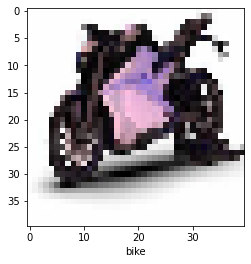

In [34]:
plot_sample(X_test,y_test,5)

### Build confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [36]:
print(classification_report(y_test,y_class))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.89      0.73      0.80        11
           2       0.78      0.70      0.74        10

    accuracy                           0.79        28
   macro avg       0.79      0.81      0.79        28
weighted avg       0.80      0.79      0.78        28



When you compare the recall the bike has a very good recall. for boat and bus it has a recall of 0.73, 0.70 respectively which is quite okay 

Text(33.0, 0.5, 'true')

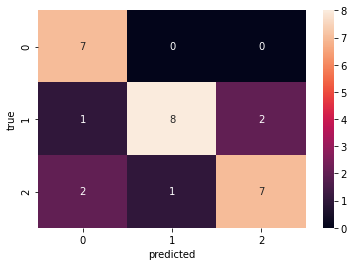

In [37]:
cm=confusion_matrix(y_test,y_class)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel("true")

The model was able to predict bike well comparing to other two vehicles. but overall the model is working well